# **Movie Recommendation System🎬**

**Introduction :**

>A movie recommendation system, or a movie recommender system, is an ML-based approach to filtering or predicting the users’ film preferences based on their past choices and behavior. It’s an advanced filtration mechanism that predicts the possible movie choices of the concerned user and their preferences towards a domain-specific item, aka movie.

Dataset is taken from the [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_credits.csv) TMDB 5000 Movie Dataset.




**Dependencies :**

* Jupyter Notebook
* Python 3.10.0
* Scikit-Learn
* Pandas
* Numpy

Install dependencies using [conda](https://docs.conda.io/en/latest/)

**📝TODO :**

*    Pick the dataset from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_credits.csv)
*    Download the dataset from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_credits.csv)
*    **Preprocessing** the data
*    Build a **Model**
*    Save the Model as .pkl


**⚙️Setup --**

In [1]:
import numpy as np
import pandas as pd

 **Dataset import :**
 
>Two different dataset is there credits and movies imported both the dataset and merge it in one data.

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')   # movies dataset
credits = pd.read_csv('tmdb_5000_credits.csv') # credits dataset

In [3]:
display(movies.head(3))  # check the movie dataset

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
display(credits.head(3))  # check the credits dataset

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


**Merge Both Dataset :**

>Both dataset have one same column 'title' merge both data basis on common ('title') column

In [5]:
movies = movies.merge(credits, on='title') # merge movies and credits data on 'title'

In [6]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
movies.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

 **Data Preprocessing :**
 
> In movies dataset have 22 columns but i will be used only few importants column to build the model.
 columns will be used for make the model ('genres', 'id', 'keywords', 'title', ''overview', 'cost', 'crew')

In [8]:
movies['original_title'].value_counts()

Out of the Blue       4
Batman                4
괴물                    2
The Host              2
La Fille du RER       1
                     ..
Step Up 3D            1
Secondhand Lions      1
The Age of Adaline    1
Drag Me to Hell       1
My Date with Drew     1
Name: original_title, Length: 4801, dtype: int64

 **Final Data**
 
>Make a final dataset with the columns which will be used to make model ('genres', 'id', 'keywords', 'title', ''overview', 'cost', 'crew').

In [9]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']] #final dataset

In [10]:
movies.head(1)  # check 1 data from final dataset

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [12]:
movies.isnull().sum()  # check missing values in dataset

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [13]:
movies.dropna(inplace=True)  # 3 missing values found in overview rows so, i drop those 3 rows

In [14]:
movies.duplicated().sum()   # check duplicat data

0

In [15]:
movies.iloc[0].genres  # print first data of genres column

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [16]:
#Now 'genres' column look like 👉 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, 
#{"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
#take all 'name' from genres column and list it like this 👉 {'Action','Adventure','Fantasy','Scifi'}

In [17]:
import ast   # ast libray cahnage the str list to an lsit
# function create for convert the obj into list
# only specially for 'genres' and 'keywords' column
# for cast and crew columns i make different different 
# function which is shwon below

def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [18]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [19]:
movies['genres'] = movies['genres'].apply(convert)  # now replace the previous 'genres' column 
                                                    # with new genres column 

In [20]:
movies.head(1)    # check genres column now it's changed to new one

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [21]:
movies['keywords'] = movies['keywords'].apply(convert) # also apply same function in 'Keywords' column

In [22]:
movies['cast'][0] # check the data of 1 cast column

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [23]:
# In cast column have so much information about the movies 
# from all the information i take only one important information 
# from cast column top 3 dictionary will be take beacuse there have actor's name

In [24]:
# function for convert the cast columns in a list
def convert_cast(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter += 1
        else:
            break
    return L

In [25]:
movies['cast'] = movies['cast'].apply(convert_cast)  # apply of conver_cast column function

In [26]:
movies.head(1)  # now check cast columns

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [27]:
movies['crew'][0]  # check crew column

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [28]:
# In the crew column also have huge data about the movie but
# i will take only 'director' name of that movie
# director name store in 'job' so, where job == 'Director' 
# pick that name and replace it in existing crew column

In [29]:
# function for conver_crew columns 
def convert_crew(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [30]:
movies['crew'] = movies['crew'].apply(convert_crew)  # apply convert_csre function and replace the existing column

In [31]:
movies.head(1)  # now check all data , it's done!

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [32]:
movies['overview'][0]   # now check 1 overview columns data

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [33]:
# This is a string conver it into list so, i can append with others column

In [34]:
movies['overview'] = movies['overview'].apply(lambda x:x.split()) # Applyed a lambda function for 
                                                                  # split the string and make it a list 

In [35]:
# movies['overview'][0]
movies.head(1)   # check the overview

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [36]:
# 🚨Now, let's first remove the space between two words beacuse if i don't
# remove space then it will be make separate tag and if there is a 
# person with same first name or last name then there model will be
# confuse which one should is right. For doing this i create  lambda
# function to remove the space between each word of every columns and
# then it will replace the previous columns with new data

In [37]:
# labda function apply only for - 'genres', 'keywords', 'cast', 'crew' columns --> 

# 1.Changes on generes column
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
# 2.Changes on 'keywords' column
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
# 3.Changes on 'cast' colum
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
# 4.Changes on 'crew' column
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [38]:
movies.head(5) # After apply all changes dataset look like this

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [39]:
# Now i make a new column 'tags' , in this column 
# i add all others 5 columns('overview', 'genres',
# 'keywords', 'cast', 'crew') data in 'tags' column

In [40]:
# Merge all data in 'tags' column
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew'] 

In [41]:
movies.head(1) 

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [42]:
# Now all data is present in a single 'tags' column so 
# i create a new_df data and remove all the others
# columns('overview','genres', 'keywords', 'cast', 'crew')
# beacuse it's not requied i stored all the data in one 
# 'tags' column and keept only 3 columns('movie_id', 'title', 'tags')

In [43]:
new_df = movies[['movie_id','title','tags']]  # create new_df with only 3 columns('movie_id','title','tags')

In [44]:
new_df 

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [45]:
# All are in list so i convert them into a string

In [46]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))   # conver 'tags' column into string

C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
new_df.head(1)  

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."


In [48]:
new_df['tags'][0]   # First data of 'tags' column

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [49]:
# For better performance convert the string to lower case

In [50]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())   # Apply lowercase on 'tags' column it will
                                                            # convert 'tags' column data into lower case

C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
new_df.head() # now all 'tags' column data in lower case

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [52]:
new_df['tags'][0]   # 1st data of 'tags' column

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [53]:
new_df['tags'][1]  # 2nd data of 'tags' column

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

# 📈Text Vectorization: Bag of Words (BoW) 

This vectorization technique converts the text content to numerical feature vectors. Bag of Words takes a document from a corpus and converts it into a numeric vector by mapping each document word to a feature vector for the machine learning model.


**Need for text vectorization :**

>Let’s say we have reviews of a movies. Text reviews provided by the customers are of different lengths. By converting from text to numbers, we can represent a review by a finite length of the vector. In this way, the length of the vector will be equal for each review, irrespective of the text length.

>Bag of words is the most trivial representation of text into vectors. Each column of a vector represents a word. The values in each cell of a row show the number of occurrences of a word in a sentence.

**Example :**
>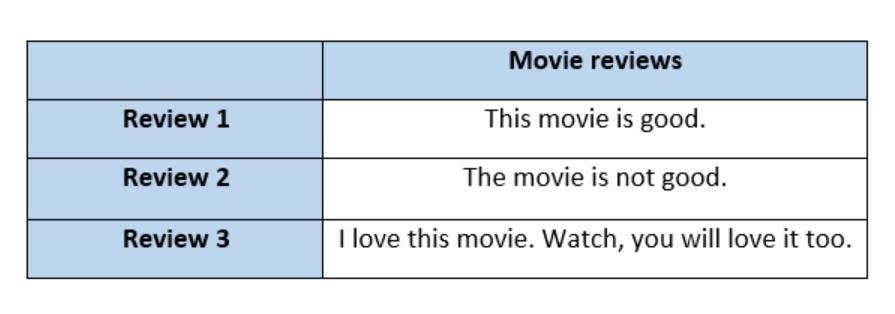

The initial step is to find a vocabulary of unique words (ignoring the punctuation and cases). Vocabulary in the above example:
>[This, movie, is, the, good, of, times, not, I, love, watch, you, will, it, too]
In our vocabulary, we have 15 unique words. Therefore, each movie review is represented by a vector of 15 dimensions (each word representing a dimension). For the reviews: click [here](https://miro.medium.com/max/1400/1*S8uW62e3AbYw3gnylm4eDg.png).

>The values corresponding to each word shows the number of occurrences of a word in a review. Similarly, 15-dimension vectors represent the remaining reviews.

**NOTE** - If you want to learn more about Text Vecorization click [here](https://towardsdatascience.com/text-vectorization-bag-of-words-bow-441d1bfce897).

 # **Natural Language Preprocessing**

>In Natural Language Processing (NLP), unnecessary words are called stopwords. nltk library already contains the list of stopwords. There are 179 stopwords in English.

In [54]:
# install nltk library 
!pip install nltk

In [55]:
# import nltk library for steming 
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

ps = PorterStemmer()  # stem define, used in below code
cv = CountVectorizer(max_features=5000,stop_words='english') # mentioned stop_words = 'english', 
                                                             # max_features = no of features should create
                                                             # it can be any number but here i set it to 
                                                             # 5000 if features is increased more 
                                                             # computational power required

# **🚨 STEM :**
>stem change slidely different words into same words as example
["love",'loving','lovers']
stem will convert the above list to like this one - ['love','love','love']

Example :
ps.stem('loved')

Output : love

In [56]:
# stem function
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [57]:
new_df['tags'] = new_df['tags'].apply(stem)    # apply stem function to 'tags' column and replacing the data

C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
vectors = cv.fit_transform(new_df['tags']).toarray()  
# cv.fit_transform change everyting into verctorize form of 0,1 (1=true, 0=false)

In [59]:
vectors[0]   # check fast vector

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
len(cv.get_feature_names())    # len of features 5000 ,i set it previously as max_features 5000

C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5000

In [61]:
cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

# **📈Cosine Similarity :**

>cosine similarity is the cosine of the angle between them, that is, the dot product of the vectors divided by the product of their lengths. It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle. The cosine similarity always belongs to the interval [-1,1], [-1,1]. For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1. The cosine 
similarity is particularly used in positive space, where the outcome is neatly bounded in [0,1] [0,1]
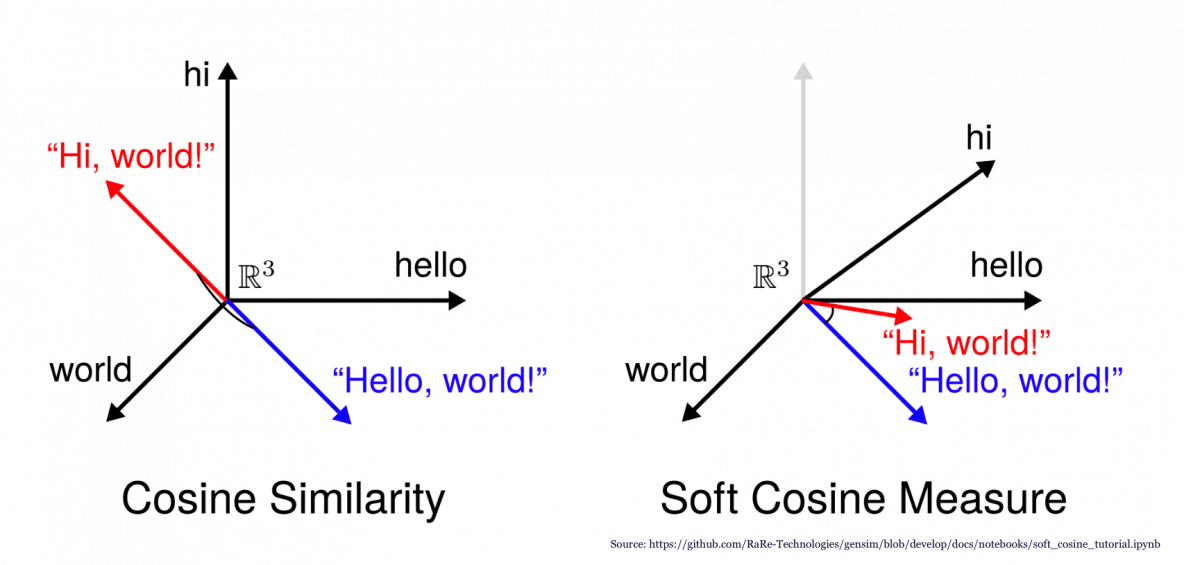

> Here i used cosine smilarity function for calculate the angle between every movies.

NOTE : Click [here](https://en.wikipedia.org/wiki/Cosine_similarity) for details information about cosine similarity

In [62]:
# Import cosine_similarity from sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
similarity = cosine_similarity(vectors) 

In [64]:
similarity[1] # after apply cosine_similarity its convert all vecors in between 0-1

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

**❗Problem :**

>To find the distance between similar movies i sorted the list but when i sorted then index number is chnaging beacuse the  index number is fixed but when movies sorted again and again as per similarity it's change the index number, as an example --> [ 1 = 'Movie_1' and 2 = 'Movie_2' if i sorted the data then it may be change into this --> 1 = 'Movie_2' and 2 = 'Movie_1' ] that is the main problem here in order to avoid that problem i assigned fixed one index number in exach movie so, again we can say that 1st index for 1st movie only , 2nd index for 2nd movie,...to fixed the index number in every movie i used enumerate function to fixed the index number of all movies and lambda is used for sorted by 2nd similarity key not sort by enumerate.

In [65]:
# function for sorted and enumerate the data
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [66]:
# recomended function - this will be take a input of movie name and will be recommended 5 movies name 
def recommend(movie):
    movie_index =new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        # print the name of the movies from new_df title column
        print(new_df.iloc[i[0]].title)

In [67]:
recommend('Batman Begins')   # test the model

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


# **Save Model**
>By using pickle library saved the model in .pkl format so, i can load this .pkl file again in vs code to use it in Web Application  

In [68]:
# Import pickle to save it in .pkl format
import pickle

In [69]:
# save it in 'wb' mode, 'wb' means write binary
# and can open it byt 'rb' mode , 'rb' mean right binary 
pickle.dump(new_df,open('movies.pkl','wb'))

In [70]:
# Created a dictionaty with movies name from dataset so i can share this 
# list to user for pick one movie and as per pick model will recommend 5 movies
pickle.dump(new_df.to_dict(),open('movies_dict.pkl','wb'))

In [71]:
new_df.to_dict()

In [72]:
# pickle the similarity matrix function for website
pickle.dump(similarity,open('similarity.pkl','wb'))